In [6]:
import pandas as pd
import numpy as np
from functools import reduce
import matplotlib.pyplot as plt

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [103]:
from sklearn.model_selection import cross_val_predict, GridSearchCV,cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
from __future__ import print_function
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline

In [9]:
variable_list = pd.read_excel('./Data/Food_Atlas.xls', sheet_name='Variable List', header=0)

In [10]:
pd.set_option('display.max_rows', None)

In [11]:
variable_list

Category Name  Category Code  \
0       Access and Proximity to Grocery Store         ACCESS   
1       Access and Proximity to Grocery Store         ACCESS   
2       Access and Proximity to Grocery Store         ACCESS   
3       Access and Proximity to Grocery Store         ACCESS   
4       Access and Proximity to Grocery Store         ACCESS   
5       Access and Proximity to Grocery Store         ACCESS   
6       Access and Proximity to Grocery Store         ACCESS   
7       Access and Proximity to Grocery Store         ACCESS   
8       Access and Proximity to Grocery Store         ACCESS   
9       Access and Proximity to Grocery Store         ACCESS   
10      Access and Proximity to Grocery Store         ACCESS   
11      Access and Proximity to Grocery Store         ACCESS   
12      Access and Proximity to Grocery Store         ACCESS   
13      Access and Proximity to Grocery Store         ACCESS   
14      Access and Proximity to Grocery Store         ACCESS   
15      Access and Proximity to Grocery Store         ACCESS   
16      Access and Proximity to Grocery Store         ACCESS   
17      Access and Proximity to Grocery Store         ACCESS   
18      Access and Proximity to Grocery Store         ACCESS   
19      Access and Proximity to Grocery Store         ACCESS   
20      Access and Proximity to Grocery Store         ACCESS   
21      Access and Proximity to Grocery Store         ACCESS   
22      Access and Proximity to Grocery Store         ACCESS   
23      Access and Proximity to Grocery Store         ACCESS   
24      Access and Proximity to Grocery Store         ACCESS   
25      Access and Proximity to Grocery Store         ACCESS   
26      Access and Proximity to Grocery Store         ACCESS   
27      Access and Proximity to Grocery Store         ACCESS   
28      Access and Proximity to Grocery Store         ACCESS   
29      Access and Proximity to Grocery Store         ACCESS   
30      Access and Proximity to Grocery Store         ACCESS   
31      Access and Proximity to Grocery Store         ACCESS   
32      Access and Proximity to Grocery Store         ACCESS   
33      Access and Proximity to Grocery Store         ACCESS   
34      Access and Proximity to Grocery Store         ACCESS   
35      Access and Proximity to Grocery Store         ACCESS   
36      Access and Proximity to Grocery Store         ACCESS   
37      Access and Proximity to Grocery Store         ACCESS   
38      Access and Proximity to Grocery Store         ACCESS   
39      Access and Proximity to Grocery Store         ACCESS   
40      Access and Proximity to Grocery Store         ACCESS   
41                         Store Availability         STORES   
42                         Store Availability         STORES   
43                         Store Availability         STORES   
44                         Store Availability         STORES   
45                         Store Availability         STORES   
46                         Store Availability         STORES   
47                         Store Availability         STORES   
48                         Store Availability         STORES   
49                         Store Availability         STORES   
50                         Store Availability         STORES   
51                         Store Availability         STORES   
52                         Store Availability         STORES   
53                         Store Availability         STORES   
54                         Store Availability         STORES   
55                         Store Availability         STORES   
56                         Store Availability         STORES   
57                         Store Availability         STORES   
58                         Store Availability         STORES   
59                         Store Availability         STORES   
60                         Store Availability         STORES   
61                         Store Availability         STORES   


In [244]:
column_dict2 = {'Population, low access to store (%), 2010': 'PCT_LACCESS_POP10', 
               'Households, no car & low access to store, 2010': 'LACCESS_HHNV10',
               'Grocery stores/1,000 pop, 2009': 'GROCPTH09',
                'Supercenters & club stores/1,000 pop, 2009': 'SUPERCPTH09',
                'Convenience stores/1,000 pop, 2009': 'CONVSPTH09',
                'Specialized food stores/1,000 pop, 2009': 'SPECSPTH09', 
                'SNAP-authorized stores/1,000 pop, 2012': 'SNAPSPTH12', 
                'WIC-authorized stores/1,000 pop, 2012':'WICSPTH12',
                'Fast-food restaurants/1,000 pop, 2009': 'FFRPTH09',
                'Full-service restaurants/1,000 pop, 2009':'FSRPTH09',
                'Expenditures per capita, fast food, 2012': 'PC_FSRSALES12',
                'SNAP participants (% pop), 2012': 'PCT_SNAP12',
                'Students eligible for free lunch (%), 2009': 'PCT_FREE_LUNCH09',
                'Price of sodas/national average, 2010': 'SODA_PRICE10',
                'Farms with direct sales (%), 2012': 'PCT_LOCLSALE12',
                'Farmers markets/1,000 pop, 2009': 'FMRKTPTH09',
                'Vegetable acres harvested/1,000 pop, 2012': 'VEG_ACRESPTH12',
                'Berry acres/1,000 pop, 2012':'BERRY_ACRESPTH12',
                'Greenhouse veg and fresh herb sq feet/1,000 pop, 2012':'GHVEG_SQFTPTH12',
                'Adult diabetes rate, 2013': 'PCT_DIABETES_ADULTS13',
                'Adult obesity rate, 2013': 'PCT_OBESE_ADULTS13', 
                'Recreation & fitness facilities/1,000 pop, 2009': 'RECFACPTH09',
                '% White, 2010': 'PCT_NHWHITE10', 
                '% Black, 2010': 'PCT_NHBLACK10',
                variable_list.iloc[264, 3]:variable_list.iloc[264, 4],
                variable_list.iloc[265, 3]:variable_list.iloc[265, 4],
                variable_list.iloc[266, 3]:variable_list.iloc[266, 4],
                variable_list.iloc[268, 3]:variable_list.iloc[268, 4],
                variable_list.iloc[269, 3]:variable_list.iloc[269, 4],
                variable_list.iloc[276, 3]:variable_list.iloc[276, 4]}

In [245]:
column_dict2

{'Population, low access to store (%), 2010': 'PCT_LACCESS_POP10',
 'Households, no car & low access to store, 2010': 'LACCESS_HHNV10',
 'Grocery stores/1,000 pop, 2009': 'GROCPTH09',
 'Supercenters & club stores/1,000 pop, 2009': 'SUPERCPTH09',
 'Convenience stores/1,000 pop, 2009': 'CONVSPTH09',
 'Specialized food stores/1,000 pop, 2009': 'SPECSPTH09',
 'SNAP-authorized stores/1,000 pop, 2012': 'SNAPSPTH12',
 'WIC-authorized stores/1,000 pop, 2012': 'WICSPTH12',
 'Fast-food restaurants/1,000 pop, 2009': 'FFRPTH09',
 'Full-service restaurants/1,000 pop, 2009': 'FSRPTH09',
 'Expenditures per capita, fast food, 2012': 'PC_FSRSALES12',
 'SNAP participants (% pop), 2012': 'PCT_SNAP12',
 'Students eligible for free lunch (%), 2009': 'PCT_FREE_LUNCH09',
 'Price of sodas/national average, 2010': 'SODA_PRICE10',
 'Farms with direct sales (%), 2012': 'PCT_LOCLSALE12',
 'Farmers markets/1,000 pop, 2009': 'FMRKTPTH09',
 'Vegetable acres harvested/1,000 pop, 2012': 'VEG_ACRESPTH12',
 'Berry acres

In [240]:
variable_list.iloc[237, 3]

'Greenhouse veg and fresh herb sq feet/1,000 pop, 2012'

In [178]:
column_dict = {'Population, low access to store (% change), 2010 -15': "PCH_LACCESS_POP_10_15",
               'Low income & low access to store (% change), 2010 -15':'PCH_LACCESS_LOWI_10_15',
               'Grocery stores/1,000 pop (% change) 2009-14': 'PCH_GROCPTH_09_14',
               'Specialized food stores/1,000 pop (% change)': 'PCH_SPECSPTH_09_14',
               'Fast-food restaurants/1,000 pop (% change), 2009-14': 'PCH_FFRPTH_09_14',
               'Full-service restaurants/1,000 pop (% change)': 'PCH_FSRPTH_09_14',
               'Expenditures per capita, restaurants, 2012': 'PC_FFRSALES12',
               'SNAP participants (change % pop), 2012-16': "PCH_SNAP_12_16",
               'SNAP benefits per capita (% change), 2010-15': 'PCH_PC_SNAPBEN_10_15',
               'National School Lunch Program participants (change % pop), 2009-15': 'PCH_NSLP_09_15',
               'Students eligible for free lunch (%), 2014': 'PCT_FREE_LUNCH14',
               'School Breakfast Program participants (change % pop), 2009-15*':'PCH_SBP_09_15',
               'WIC participants (change % pop), 2009-15*': 'PCH_WIC_09_15',
               'Price of low-fat milk/price of sodas, 2010': 'MILK_SODA_PRICE10',
               'Soda sales tax, retail stores, 2014': 'SODATAX_STORES14',
               "Community Supported Agriculature farms (% change), 2007 - 12": "PCH_CSA_07_12",
               "Greenhouse veg and fresh herb sq feet/1,000 pop (% change), 2007 - 12": "PCH_GHVEG_SQFTPTH_07_12",
               'Farms with direct sales (% change), 2007 - 12': 'PCH_DIRSALES_FARMS_07_12',
               'Farmers markets/1,000 pop (% change), 2009-16': 'PCH_FMRKTPTH_09_16',
               'Farmers markets that report accepting WIC (%), 2016': 'PCT_FMRKT_WIC16',
               'Farmers markets that report accepting SNAP (%), 2016': 'PCT_FMRKT_SNAP16',
               'Vegetable farms (% change), 2007 - 12': 'PCH_VEG_FARMS_07_12',
               'Farm to school program, 2009': 'FARM_TO_SCHOOL09',
               'Recreation & fitness facilities/1,000 pop (% change), 2009-14': 'PCH_RECFACPTH_09_14',
               'FIPS':'FIPS', 
               'State': 'State',
               'County': 'County'
              }

In [188]:
column_dict = {y:x for x,y in column_dict.items()}


In [13]:
variable_list.iloc[88, 3]

'Full-service restaurants/1,000 pop (% change), 2009-14'

In [14]:
column_dict

{'Population, low access to store (% change), 2010 -15': 'PCH_LACCESS_POP_10_15',
 'Low income & low access to store (% change), 2010 -15': 'PCH_LACCESS_LOWI_10_15',
 'Grocery stores/1,000 pop (% change) 2009-14': 'PCH_GROCPTH_09_14',
 'Specialized food stores/1,000 pop (% change)': 'PCH_SPECSPTH_09_14',
 'Fast-food restaurants/1,000 pop (% change), 2009-14': 'PCH_FFRPTH_09_14',
 'Full-service restaurants/1,000 pop (% change)': 'PCH_FSRPTH_09_14',
 'Expenditures per capita, restaurants, 2012': 'PC_FFRSALES12',
 'SNAP participants (change % pop), 2012-16': 'PCH_SNAP_12_16',
 'SNAP benefits per capita (% change), 2010-15': 'PCH_PC_SNAPBEN_10_15',
 'National School Lunch Program participants (change % pop), 2009-15': 'PCH_NSLP_09_15',
 'Students eligible for free lunch (%), 2014': 'PCT_FREE_LUNCH14',
 'School Breakfast Program participants (change % pop), 2009-15*': 'PCH_SBP_09_15',
 'WIC participants (change % pop), 2009-15*': 'PCH_WIC_09_15',
 'Price of low-fat milk/price of sodas, 2010

In [15]:
health = pd.read_excel('./Data/Food_Atlas.xls', sheet_name='HEALTH', header=0)

In [16]:
health['Percent_Change_Obese'] = health.PCT_OBESE_ADULTS13 - health.PCT_OBESE_ADULTS08

In [17]:
health['Percent_Change_Diabetes'] = health.PCT_DIABETES_ADULTS13 - health.PCT_DIABETES_ADULTS08

In [18]:
health = health[['FIPS', "State", 'County', 'PCH_RECFACPTH_09_14', 'Percent_Change_Obese', 'Percent_Change_Diabetes']]

In [19]:
health.head()

FIPS State   County  PCH_RECFACPTH_09_14  Percent_Change_Obese  \
0  1001    AL  Autauga            22.156783                   2.6   
1  1003    AL  Baldwin            24.518392                   1.2   
2  1005    AL  Barbour          -100.000000                   6.8   
3  1007    AL     Bibb             1.932818                   8.0   
4  1009    AL   Blount            -0.654897                   2.7   

   Percent_Change_Diabetes  
0                      1.6  
1                      0.6  
2                      4.8  
3                      3.7  
4                      2.7

In [20]:
access = pd.read_excel('./Data/Food_Atlas.xls', sheet_name='ACCESS', header=0)

In [21]:
access.head()

FIPS State   County  LACCESS_POP10  LACCESS_POP15  PCH_LACCESS_POP_10_15  \
0  1001    AL  Autauga   18428.439685   17496.693038              -5.056026   
1  1003    AL  Baldwin   35210.814078   30561.264430             -13.204891   
2  1005    AL  Barbour    5722.305602    6069.523628               6.067799   
3  1007    AL     Bibb    1044.867327     969.378841              -7.224696   
4  1009    AL   Blount    1548.175559    3724.428242             140.568857   

   PCT_LACCESS_POP10  PCT_LACCESS_POP15  LACCESS_LOWI10  LACCESS_LOWI15  \
0          33.769657          32.062255     5344.427472     6543.676824   
1          19.318473          16.767489     9952.144027     9886.831137   
2          20.840972          22.105560     3135.676086     2948.790251   
3           4.559753           4.230324      491.449066      596.162829   
4           2.700840           6.497380      609.027708     1650.959482   

           ...           LACCESS_HISP15  PCT_LACCESS_HISP15  \
0          ...               471.136164            0.863345   
1          ...              1377.874834            0.755973   
2          ...               509.377525            1.855183   
3          ...                 8.596762            0.037516   
4          ...               497.489891            0.867886   

   LACCESS_NHASIAN15  PCT_LACCESS_NHASIAN15  LACCESS_NHNA15  \
0          86.767975               0.159000       61.169869   
1         212.946378               0.116833      181.649648   
2          17.096410               0.062266       39.960527   
3           1.994318               0.008703        2.513097   
4           8.428994               0.014705       28.938242   

   PCT_LACCESS_NHNA15  LACCESS_NHPI15  PCT_LACCESS_NHPI15  LACCESS_MULTIR15  \
0            0.112092        8.817961            0.016159        482.848633   
1            0.099662       14.819634            0.008131       1127.696098   
2            0.145539        8.082376            0.029436        462.382655   
3            0.010967        0.000000            0.000000          5.259244   
4            0.050484        1.062851            0.001854        202.914187   

   PCT_LACCESS_MULTIR15  
0              0.884808  
1              0.618712  
2              1.684025  
3              0.022951  
4              0.353990  

[5 rows x 44 columns]

In [22]:
column_dict

{'Population, low access to store (% change), 2010 -15': 'PCH_LACCESS_POP_10_15',
 'Low income & low access to store (% change), 2010 -15': 'PCH_LACCESS_LOWI_10_15',
 'Grocery stores/1,000 pop (% change) 2009-14': 'PCH_GROCPTH_09_14',
 'Specialized food stores/1,000 pop (% change)': 'PCH_SPECSPTH_09_14',
 'Fast-food restaurants/1,000 pop (% change), 2009-14': 'PCH_FFRPTH_09_14',
 'Full-service restaurants/1,000 pop (% change)': 'PCH_FSRPTH_09_14',
 'Expenditures per capita, restaurants, 2012': 'PC_FFRSALES12',
 'SNAP participants (change % pop), 2012-16': 'PCH_SNAP_12_16',
 'SNAP benefits per capita (% change), 2010-15': 'PCH_PC_SNAPBEN_10_15',
 'National School Lunch Program participants (change % pop), 2009-15': 'PCH_NSLP_09_15',
 'Students eligible for free lunch (%), 2014': 'PCT_FREE_LUNCH14',
 'School Breakfast Program participants (change % pop), 2009-15*': 'PCH_SBP_09_15',
 'WIC participants (change % pop), 2009-15*': 'PCH_WIC_09_15',
 'Price of low-fat milk/price of sodas, 2010

In [23]:
access = access[['FIPS', "State", 'County', 'PCH_LACCESS_POP_10_15', 'PCH_LACCESS_LOWI_10_15', 'PCH_LACCESS_POP_10_15', 'PCH_LACCESS_LOWI_10_15']]

In [24]:
access.head()

FIPS State   County  PCH_LACCESS_POP_10_15  PCH_LACCESS_LOWI_10_15  \
0  1001    AL  Autauga              -5.056026               22.439248   
1  1003    AL  Baldwin             -13.204891               -0.656270   
2  1005    AL  Barbour               6.067799               -5.959985   
3  1007    AL     Bibb              -7.224696               21.307144   
4  1009    AL   Blount             140.568857              171.081177   

   PCH_LACCESS_POP_10_15  PCH_LACCESS_LOWI_10_15  
0              -5.056026               22.439248  
1             -13.204891               -0.656270  
2               6.067799               -5.959985  
3              -7.224696               21.307144  
4             140.568857              171.081177

In [25]:
stores = pd.read_excel('./Data/Food_Atlas.xls', sheet_name='STORES', header=0)

In [26]:
stores.head()

FIPS State   County  GROC09  GROC14  PCH_GROC_09_14  GROCPTH09  GROCPTH14  \
0  1001    AL  Autauga       6       4      -33.333333   0.110834   0.072209   
1  1003    AL  Baldwin      24      29       20.833333   0.133775   0.144920   
2  1005    AL  Barbour       5       5        0.000000   0.180786   0.185963   
3  1007    AL     Bibb       6       5      -16.666667   0.261540   0.222163   
4  1009    AL   Blount       6       6        0.000000   0.104637   0.103952   

   PCH_GROCPTH_09_14  SUPERC09        ...          PCH_SNAPS_12_16  \
0         -34.849716         1        ...                12.694878   
1           8.331001         6        ...                43.192771   
2           2.863838         0        ...                 0.956938   
3         -15.055985         1        ...                20.512821   
4          -0.654897         1        ...                23.903509   

   SNAPSPTH12  SNAPSPTH16  PCH_SNAPSPTH_12_16  WICS08  WICS12  PCH_WICS_08_12  \
0    0.674004    0.760911           12.894172       6       5       -16.66667   
1    0.725055    0.949753           30.990390      25      27         8.00000   
2    1.280590    1.354387            5.762745       6       7        16.66667   
3    0.719122    0.864874           20.267995       6       5       -16.66667   
4    0.657144    0.815946           24.165470      10       6       -40.00000   

   WICSPTH08  WICSPTH12  PCH_WICSPTH_08_12  
0   0.119156   0.090067         -24.412460  
1   0.141875   0.141517          -0.252126  
2   0.201099   0.257344          27.968330  
3   0.277919   0.221268         -20.383970  
4   0.173028   0.103760         -40.033200  

[5 rows x 39 columns]

In [27]:
stores = stores[['FIPS', "State", 'County', 'PCH_GROCPTH_09_14', 'PCH_SPECSPTH_09_14']]

In [28]:
stores.head()

FIPS State   County  PCH_GROCPTH_09_14  PCH_SPECSPTH_09_14
0  1001    AL  Autauga         -34.849716           -2.274574
1  1003    AL  Baldwin           8.331001           10.999253
2  1005    AL  Barbour           2.863838            2.863838
3  1007    AL     Bibb         -15.055985                 NaN
4  1009    AL   Blount          -0.654897         -100.000000

In [29]:
restaurants = pd.read_excel('./Data/Food_Atlas.xls', sheet_name='RESTAURANTS', header=0)

In [30]:
restaurants = restaurants[['FIPS', "State", 'County', 'PCH_FFRPTH_09_14', 'PCH_FSRPTH_09_14', 'PC_FFRSALES12']]

In [31]:
restaurants.head()

FIPS State   County  PCH_FFRPTH_09_14  PCH_FSRPTH_09_14  PC_FFRSALES12
0  1001    AL  Autauga         17.270512        -16.645960      674.80272
1  1003    AL  Baldwin          5.662750         -1.914027      674.80272
2  1005    AL  Barbour          7.762116         28.579797      674.80272
3  1007    AL     Bibb        -27.190844        -15.055985      674.80272
4  1009    AL   Blount        -13.073035        -21.569656      674.80272

In [32]:
assistance = pd.read_excel('./Data/Food_Atlas.xls', sheet_name='ASSISTANCE', header=0)

In [33]:
assistance = assistance[['FIPS', "State", 'County', "PCH_SNAP_12_16", 'PCH_PC_SNAPBEN_10_15', 'PCH_NSLP_09_15', 
                         'PCT_FREE_LUNCH14', 'PCH_SBP_09_15', 'PCH_WIC_09_15']]

In [34]:
assistance.head()

FIPS State   County  PCH_SNAP_12_16  PCH_PC_SNAPBEN_10_15  PCH_NSLP_09_15  \
0  1001    AL  Autauga       -1.848239              7.266521       -1.380526   
1  1003    AL  Baldwin       -1.848239              0.126761       -1.380526   
2  1005    AL  Barbour       -1.848239             14.786135       -1.380526   
3  1007    AL     Bibb       -1.848239             -3.257058       -1.380526   
4  1009    AL   Blount       -1.848239            -17.552722       -1.380526   

   PCT_FREE_LUNCH14  PCH_SBP_09_15  PCH_WIC_09_15  
0               NaN       0.723991      -0.271065  
1         36.756439       0.723991      -0.271065  
2         63.931806       0.723991      -0.271065  
3         54.334227       0.723991      -0.271065  
4         44.987980       0.723991      -0.271065

In [35]:
prices_taxes = pd.read_excel('./Data/Food_Atlas.xls', sheet_name='PRICES_TAXES', header=0)


In [36]:
prices_taxes = prices_taxes[['FIPS', "State", 'County', 'MILK_SODA_PRICE10', 'SODATAX_STORES14']]

In [37]:
prices_taxes.head()

FIPS State   County  MILK_SODA_PRICE10  SODATAX_STORES14
0  1001    AL  Autauga           0.923289               4.0
1  1003    AL  Baldwin           0.940165               4.0
2  1005    AL  Barbour           1.059400               4.0
3  1007    AL     Bibb           0.923289               4.0
4  1009    AL   Blount           0.923289               4.0

In [38]:
local = pd.read_excel('./Data/Food_Atlas.xls', sheet_name='LOCAL', header=0)

In [39]:
local = local[['FIPS', "State", 'County', 'PCH_CSA_07_12', 'PCH_GHVEG_SQFTPTH_07_12','PCH_DIRSALES_FARMS_07_12', 
               'PCH_FMRKTPTH_09_16', 'PCT_FMRKT_WIC16', 'PCT_FMRKT_SNAP16', 'PCH_VEG_FARMS_07_12', 'FARM_TO_SCHOOL09']]

In [40]:
local.head()

FIPS State   County  PCH_CSA_07_12  PCH_GHVEG_SQFTPTH_07_12  \
0  1001    AL  Autauga      50.000000                      NaN   
1  1003    AL  Baldwin     -46.153846                      NaN   
2  1005    AL  Barbour    -100.000000                      NaN   
3  1007    AL     Bibb      50.000000                      NaN   
4  1009    AL   Blount     -42.857143                      NaN   

   PCH_DIRSALES_FARMS_07_12  PCH_FMRKTPTH_09_16  PCT_FMRKT_WIC16  \
0                104.000000          -54.204562              0.0   
1                 28.750000          -13.753638              0.0   
2                -27.777778          129.054496              0.0   
3                  8.333333           -4.663693              0.0   
4                  4.761905            1.110842            100.0   

   PCT_FMRKT_SNAP16  PCH_VEG_FARMS_07_12  FARM_TO_SCHOOL09  
0               0.0            32.352941               0.0  
1               0.0            -1.960784               0.0  
2              50.0           -36.363636               0.0  
3               0.0            10.000000               0.0  
4               0.0            -4.477612               0.0

In [41]:
dfs = [health, access, stores, restaurants, prices_taxes, local]

In [42]:
df_1 = pd.merge(pd.merge(health,access,on='FIPS'), stores,on='FIPS')

In [43]:
df_1= df_1.drop('State_x', axis=1)

In [44]:
df_1= df_1.drop('County_x', axis=1)

In [45]:
df_1 = df_1.drop('State_y', axis=1)

In [46]:
df_1 = df_1.drop('County_y', axis=1)

In [47]:
df_2 = pd.merge(pd.merge(restaurants,prices_taxes, on='FIPS'), df_1, on='FIPS')

In [48]:
df_2= df_2.drop('State_x', axis=1)
df_2 = df_2.drop('County_x', axis=1)
df_2 = df_2.drop('State_y', axis=1)
df_2 = df_2.drop('County_y', axis=1)

In [49]:
df_3 = pd.merge(df_2, local, on='FIPS')

In [50]:
pd.set_option('display.max_columns', None)

In [51]:
# df_3= df_3.drop('State_x', axis=1)
# df_3 = df_3.drop('County_x', axis=1)
df_3 = df_3.drop('State_y', axis=1)
df_3 = df_3.drop('County_y', axis=1)

In [52]:
df_3.head()

FIPS  PCH_FFRPTH_09_14  PCH_FSRPTH_09_14  PC_FFRSALES12  MILK_SODA_PRICE10  \
0  1001         17.270512        -16.645960      674.80272           0.923289   
1  1003          5.662750         -1.914027      674.80272           0.940165   
2  1005          7.762116         28.579797      674.80272           1.059400   
3  1007        -27.190844        -15.055985      674.80272           0.923289   
4  1009        -13.073035        -21.569656      674.80272           0.923289   

   SODATAX_STORES14  PCH_RECFACPTH_09_14  Percent_Change_Obese  \
0               4.0            22.156783                   2.6   
1               4.0            24.518392                   1.2   
2               4.0          -100.000000                   6.8   
3               4.0             1.932818                   8.0   
4               4.0            -0.654897                   2.7   

   Percent_Change_Diabetes  PCH_LACCESS_POP_10_15  PCH_LACCESS_LOWI_10_15  \
0                      1.6              -5.056026               22.439248   
1                      0.6             -13.204891               -0.656270   
2                      4.8               6.067799               -5.959985   
3                      3.7              -7.224696               21.307144   
4                      2.7             140.568857              171.081177   

   PCH_LACCESS_POP_10_15  PCH_LACCESS_LOWI_10_15 State_x County_x  \
0              -5.056026               22.439248      AL  Autauga   
1             -13.204891               -0.656270      AL  Baldwin   
2               6.067799               -5.959985      AL  Barbour   
3              -7.224696               21.307144      AL     Bibb   
4             140.568857              171.081177      AL   Blount   

   PCH_GROCPTH_09_14  PCH_SPECSPTH_09_14  PCH_CSA_07_12  \
0         -34.849716           -2.274574      50.000000   
1           8.331001           10.999253     -46.153846   
2           2.863838            2.863838    -100.000000   
3         -15.055985                 NaN      50.000000   
4          -0.654897         -100.000000     -42.857143   

   PCH_GHVEG_SQFTPTH_07_12  PCH_DIRSALES_FARMS_07_12  PCH_FMRKTPTH_09_16  \
0                      NaN                104.000000          -54.204562   
1                      NaN                 28.750000          -13.753638   
2                      NaN                -27.777778          129.054496   
3                      NaN                  8.333333           -4.663693   
4                      NaN                  4.761905            1.110842   

   PCT_FMRKT_WIC16  PCT_FMRKT_SNAP16  PCH_VEG_FARMS_07_12  FARM_TO_SCHOOL09  
0              0.0               0.0            32.352941               0.0  
1              0.0               0.0            -1.960784               0.0  
2              0.0              50.0           -36.363636               0.0  
3              0.0               0.0            10.000000               0.0  
4            100.0               0.0            -4.477612               0.0

In [53]:
df_3['State'] = df_3['State_x']
df_3['County'] = df_3['County_x']

In [237]:
#Count NANs to decide which columns to chuck:
count_nan = len(df_3) - df_3.count()
count_nan

FIPS                                                             0
Fast-food restaurants/1,000 pop (% change), 2009-14              0
Full-service restaurants/1,000 pop (% change)                    0
Expenditures per capita, restaurants, 2012                       0
Price of low-fat milk/price of sodas, 2010                       0
Soda sales tax, retail stores, 2014                              0
Recreation & fitness facilities/1,000 pop (% change), 2009-14    0
Percent_Change_Obese                                             0
Percent_Change_Diabetes                                          0
Population, low access to store (% change), 2010 -15             0
Low income & low access to store (% change), 2010 -15            0
Grocery stores/1,000 pop (% change) 2009-14                      0
Specialized food stores/1,000 pop (% change)                     0
Community Supported Agriculature farms (% change), 2007 - 12     0
Farms with direct sales (% change), 2007 - 12                 

In [55]:
#Drop column(s) w/ too many missing values:
df_3 = df_3.drop('PCH_GHVEG_SQFTPTH_07_12', axis=1)

In [56]:
df_3 = df_3.loc[:,~df_3.columns.duplicated()]

In [57]:
from sklearn.preprocessing import Imputer

In [58]:
#Replace missing values with median

In [59]:
imputer = Imputer(missing_values=np.nan, strategy='median', axis=0)

C:\Users\chris\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [60]:
df_3.isnull().sum()

FIPS                          0
PCH_FFRPTH_09_14             46
PCH_FSRPTH_09_14             31
PC_FFRSALES12                 0
MILK_SODA_PRICE10            34
SODATAX_STORES14              0
PCH_RECFACPTH_09_14         123
Percent_Change_Obese          6
Percent_Change_Diabetes       6
PCH_LACCESS_POP_10_15        26
PCH_LACCESS_LOWI_10_15       28
State_x                       0
County_x                      0
PCH_GROCPTH_09_14            15
PCH_SPECSPTH_09_14          188
PCH_CSA_07_12               796
PCH_DIRSALES_FARMS_07_12    124
PCH_FMRKTPTH_09_16          551
PCT_FMRKT_WIC16             895
PCT_FMRKT_SNAP16            895
PCH_VEG_FARMS_07_12         350
FARM_TO_SCHOOL09              5
State                         0
County                        0
dtype: int64

In [61]:
df_3[['PCH_FFRPTH_09_14']] = imputer.fit_transform(df_3[['PCH_FFRPTH_09_14']])

In [62]:
df_3[['PCH_FSRPTH_09_14']] = imputer.fit_transform(df_3[['PCH_FSRPTH_09_14']])

In [63]:
df_3[['MILK_SODA_PRICE10']] = imputer.fit_transform(df_3[['MILK_SODA_PRICE10']])

In [64]:
df_3[['PCH_RECFACPTH_09_14']] = imputer.fit_transform(df_3[['PCH_RECFACPTH_09_14']])

In [65]:
df_3[['Percent_Change_Obese']] = imputer.fit_transform(df_3[['Percent_Change_Obese']])
df_3[['Percent_Change_Diabetes']] = imputer.fit_transform(df_3[['Percent_Change_Diabetes']])


In [66]:
df_3.isnull().sum()

FIPS                          0
PCH_FFRPTH_09_14              0
PCH_FSRPTH_09_14              0
PC_FFRSALES12                 0
MILK_SODA_PRICE10             0
SODATAX_STORES14              0
PCH_RECFACPTH_09_14           0
Percent_Change_Obese          0
Percent_Change_Diabetes       0
PCH_LACCESS_POP_10_15        26
PCH_LACCESS_LOWI_10_15       28
State_x                       0
County_x                      0
PCH_GROCPTH_09_14            15
PCH_SPECSPTH_09_14          188
PCH_CSA_07_12               796
PCH_DIRSALES_FARMS_07_12    124
PCH_FMRKTPTH_09_16          551
PCT_FMRKT_WIC16             895
PCT_FMRKT_SNAP16            895
PCH_VEG_FARMS_07_12         350
FARM_TO_SCHOOL09              5
State                         0
County                        0
dtype: int64

In [67]:
df_3[['PCH_LACCESS_POP_10_15']] = imputer.fit_transform(df_3[['PCH_LACCESS_POP_10_15']])
df_3[['PCH_LACCESS_LOWI_10_15']] = imputer.fit_transform(df_3[['PCH_LACCESS_LOWI_10_15']])

In [68]:
df_3[['PCH_LACCESS_POP_10_15']] = imputer.fit_transform(df_3[['PCH_LACCESS_POP_10_15']])
df_3[['PCH_LACCESS_LOWI_10_15']] = imputer.fit_transform(df_3[['PCH_LACCESS_LOWI_10_15']])

In [69]:
df_3[['PCH_GROCPTH_09_14']] = imputer.fit_transform(df_3[['PCH_GROCPTH_09_14']])
df_3[['PCH_SPECSPTH_09_14']] = imputer.fit_transform(df_3[['PCH_SPECSPTH_09_14']])

In [70]:
df_3[['PCH_CSA_07_12']] = imputer.fit_transform(df_3[['PCH_CSA_07_12']])
df_3[['PCH_DIRSALES_FARMS_07_12']] = imputer.fit_transform(df_3[['PCH_DIRSALES_FARMS_07_12']])

In [71]:
df_3[['PCH_FMRKTPTH_09_16']] = imputer.fit_transform(df_3[['PCH_FMRKTPTH_09_16']])
df_3[['PCT_FMRKT_WIC16']] = imputer.fit_transform(df_3[['PCT_FMRKT_WIC16']])

In [72]:
df_3[['PCT_FMRKT_SNAP16']] = imputer.fit_transform(df_3[['PCT_FMRKT_SNAP16']])
df_3[['PCH_VEG_FARMS_07_12']] = imputer.fit_transform(df_3[['PCH_VEG_FARMS_07_12']])
df_3[['FARM_TO_SCHOOL09']] = imputer.fit_transform(df_3[['FARM_TO_SCHOOL09']])


In [173]:
df_3.head()

FIPS  PCH_FFRPTH_09_14  PCH_FSRPTH_09_14  PC_FFRSALES12  MILK_SODA_PRICE10  \
0  1001         17.270512        -16.645960      674.80272           0.923289   
1  1003          5.662750         -1.914027      674.80272           0.940165   
2  1005          7.762116         28.579797      674.80272           1.059400   
3  1007        -27.190844        -15.055985      674.80272           0.923289   
4  1009        -13.073035        -21.569656      674.80272           0.923289   

   SODATAX_STORES14  PCH_RECFACPTH_09_14  Percent_Change_Obese  \
0               4.0            22.156783                   2.6   
1               4.0            24.518392                   1.2   
2               4.0          -100.000000                   6.8   
3               4.0             1.932818                   8.0   
4               4.0            -0.654897                   2.7   

   Percent_Change_Diabetes  PCH_LACCESS_POP_10_15  PCH_LACCESS_LOWI_10_15  \
0                      1.6              -5.056026               22.439248   
1                      0.6             -13.204891               -0.656270   
2                      4.8               6.067799               -5.959985   
3                      3.7              -7.224696               21.307144   
4                      2.7             140.568857              171.081177   

  State_x County_x  PCH_GROCPTH_09_14  PCH_SPECSPTH_09_14  PCH_CSA_07_12  \
0      AL  Autauga         -34.849716           -2.274574      50.000000   
1      AL  Baldwin           8.331001           10.999253     -46.153846   
2      AL  Barbour           2.863838            2.863838    -100.000000   
3      AL     Bibb         -15.055985            0.000000      50.000000   
4      AL   Blount          -0.654897         -100.000000     -42.857143   

   PCH_DIRSALES_FARMS_07_12  PCH_FMRKTPTH_09_16  PCT_FMRKT_WIC16  \
0                104.000000          -54.204562              0.0   
1                 28.750000          -13.753638              0.0   
2                -27.777778          129.054496              0.0   
3                  8.333333           -4.663693              0.0   
4                  4.761905            1.110842            100.0   

   PCT_FMRKT_SNAP16  PCH_VEG_FARMS_07_12  FARM_TO_SCHOOL09 State   County  
0               0.0            32.352941               0.0    AL  Autauga  
1               0.0            -1.960784               0.0    AL  Baldwin  
2              50.0           -36.363636               0.0    AL  Barbour  
3               0.0            10.000000               0.0    AL     Bibb  
4               0.0            -4.477612               0.0    AL   Blount

In [174]:
df_3=df_3.drop('State_x', axis=1)
df_3=df_3.drop('County_x', axis=1)

In [190]:
df_3 = df_3.rename(columns = column_dict)

In [191]:
df_3.head()

FIPS  Fast-food restaurants/1,000 pop (% change), 2009-14  \
0  1001                                          17.270512     
1  1003                                           5.662750     
2  1005                                           7.762116     
3  1007                                         -27.190844     
4  1009                                         -13.073035     

   Full-service restaurants/1,000 pop (% change)  \
0                                     -16.645960   
1                                      -1.914027   
2                                      28.579797   
3                                     -15.055985   
4                                     -21.569656   

   Expenditures per capita, restaurants, 2012  \
0                                   674.80272   
1                                   674.80272   
2                                   674.80272   
3                                   674.80272   
4                                   674.80272   

   Price of low-fat milk/price of sodas, 2010  \
0                                    0.923289   
1                                    0.940165   
2                                    1.059400   
3                                    0.923289   
4                                    0.923289   

   Soda sales tax, retail stores, 2014  \
0                                  4.0   
1                                  4.0   
2                                  4.0   
3                                  4.0   
4                                  4.0   

   Recreation & fitness facilities/1,000 pop (% change), 2009-14  \
0                                          22.156783               
1                                          24.518392               
2                                        -100.000000               
3                                           1.932818               
4                                          -0.654897               

   Percent_Change_Obese  Percent_Change_Diabetes  \
0                   2.6                      1.6   
1                   1.2                      0.6   
2                   6.8                      4.8   
3                   8.0                      3.7   
4                   2.7                      2.7   

   Population, low access to store (% change), 2010 -15  \
0                                          -5.056026      
1                                         -13.204891      
2                                           6.067799      
3                                          -7.224696      
4                                         140.568857      

   Low income & low access to store (% change), 2010 -15  \
0                                          22.439248       
1                                          -0.656270       
2                                          -5.959985       
3                                          21.307144       
4                                         171.081177       

   Grocery stores/1,000 pop (% change) 2009-14  \
0                                   -34.849716   
1                                     8.331001   
2                                     2.863838   
3                                   -15.055985   
4                                    -0.654897   

   Specialized food stores/1,000 pop (% change)  \
0                                     -2.274574   
1                                     10.999253   
2                                      2.863838   
3                                      0.000000   
4                                   -100.000000   

   Community Supported Agriculature farms (% change), 2007 - 12  \
0                                          50.000000              
1                                         -46.153846              
2                                        -100.000000              
3                                          50.000000              
4                                         -42.857143              

   Farms with

In [192]:
newX=df_3.drop('Percent_Change_Obese', axis=1)
newX=newX.drop('State', axis=1)
newX=newX.drop('County', axis=1)
newX=newX.drop('FIPS', axis=1)
newX = newX.apply(pd.to_numeric)

In [193]:
newX

Fast-food restaurants/1,000 pop (% change), 2009-14  \
0                                             17.270512     
1                                              5.662750     
2                                              7.762116     
3                                            -27.190844     
4                                            -13.073035     
5                                            -23.446210     
6                                              2.813362     
7                                             10.709833     
8                                             19.250019     
9                                             -6.908918     
10                                           -13.928265     
11                                            57.351948     
12                                            17.996636     
13                                             3.350059     
14                                            13.057977     
15                                            -5.660240     
16                                            26.557207     
17                                            46.674033     
18                                             1.837790     
19                                            -4.673524     
20                                            67.227111     
21                                             4.776858     
22                                             3.800678     
23                                            -0.335523     
24                                             4.581412     
25                                            50.678801     
26                                            24.405572     
27                                            -2.999702     
28                                           -23.062107     
29                                           -18.212887     
30                                            -0.220875     
31                                             7.354145     
32                                            47.754215     
33                                             0.308319     
34                                            12.725238     
35                                            -1.872274     
36                                            10.677317     
37                                           -10.616418     
38                                            17.310106     
39                                           -34.397945     
40                                             6.464212     
41                                             1.522758     
42                                          -100.000000     
43                                            -1.822394     
44                                             3.894559     
45                                            25.009324     
46                                           -33.805394     
47                                            -1.168341     
48                                            -0.753753     
49                                            -4.787898     
50                                            25.039355     
51                                            -1.540495     
52                                           -45.603501     
53                                            29.725837     
54                                             7.268861     
55                                           -17.002045     
56                                           -12.491612     
57                                            -2.259185     
58                                             2.721882     
59                                             4.405286     
60                                             1.662527     
61                                           -15.318434     
62                                            -2.848195     
63                                            -6.278200     
64                                       

In [194]:
newX = newX.apply(pd.to_numeric)

In [195]:
newY=df_3['Percent_Change_Obese']

In [196]:
RANDOM_STATE = 42
FIG_SIZE = (10, 7)

In [197]:
X_train, X_test, y_train, y_test = train_test_split(newX, newY,
                                                    test_size=0.30,
                                                    random_state=RANDOM_STATE)

In [198]:
scaler = StandardScaler().fit(X_train)

In [199]:
StandardScaler(copy=True, with_mean=True, with_std=True)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [200]:
scaler.mean_

array([ 4.45478799e+00,  3.14497275e+00,  5.99837747e+02,  9.08693391e-01,
        3.96387727e+00, -6.31932546e+00,  1.33650000e+00,  1.01587775e+04,
        1.03450789e+04, -2.49076945e+00, -5.86289528e+00,  4.23268353e-01,
        1.51996644e+01,  2.77517324e+01,  1.52274852e+01,  1.67448366e+01,
        2.12708875e+01,  6.27272727e-02])

In [201]:
X_train = scaler.transform(X_train) 

In [202]:
X_test = scaler.transform(X_test) 

In [ ]:
# unscaled_clf = make_pipeline(PCA)
# unscaled_clf.fit(X_train, y_train)
# pred_test = unscaled_clf.predict(X_test)

In [ ]:
# std_clf = make_pipeline(StandardScaler(), PCA(n_components=2), GaussianNB())
# std_clf.fit(X_train, y_train)
# pred_test_std = std_clf.predict(X_t

In [203]:
len(X_test), len(y_test)

(943, 943)

In [204]:
lr = LinearRegression()

In [205]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [206]:
lr.score(X_test,y_test)

0.049287405759661174

In [238]:
lr.score(X_train, y_train)

0.11395658680327458

In [207]:
rr = Ridge(alpha=0.01)

In [208]:
rr.fit(X_train, y_train)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [209]:
rr100 = Ridge(alpha=100) #  comparison with alpha value

In [210]:
rr100.fit(X_train, y_train)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [211]:
train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)
Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)
Ridge_train_score100 = rr100.score(X_train,y_train)
Ridge_test_score100 = rr100.score(X_test, y_test)

In [212]:
print("linear regression train score:", train_score)
print("linear regression test score:", test_score)
print("ridge regression train score low alpha:", Ridge_train_score)
print("ridge regression test score low alpha:", Ridge_test_score)
print("ridge regression train score high alpha:", Ridge_train_score100)
print("ridge regression test score high alpha:", Ridge_test_score100)

linear regression train score: 0.11395658680327458
linear regression test score: 0.049287405759661174
ridge regression train score low alpha: 0.11395384382938056
ridge regression test score low alpha: 0.04928334277516843
ridge regression train score high alpha: 0.11372267265558433
ridge regression test score high alpha: 0.051455966879886066


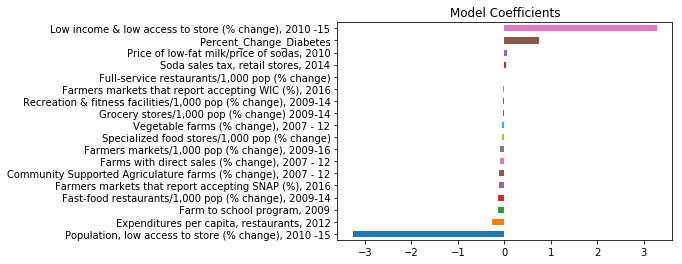

In [236]:
predictors = newX.columns

coef = pd.Series(lr.coef_,predictors).sort_values()

coef.plot(kind='barh', title='Model Coefficients')

 

In [217]:
lassoReg = Lasso(alpha=0.3, normalize=True)

In [218]:
lassoReg.fit(X_train, y_train)

Lasso(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [219]:
pred = lassoReg.predict(X_test)

In [220]:
lassoReg.score(X_test, y_test)

-0.0006016284093695035

In [221]:
rfr = RandomForestRegressor(random_state=0, n_estimators = 600, criterion='mse')

In [222]:
rfr.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [224]:
predictions = rfr.predict(X_test)

In [225]:
#r squared value:
#Find a new metric for test set
#Okay for training data, but something is lost for test data. 
#Use root MSE metric --> harder to interpret (closer to 0)

print(rfr.score(X_test, y_test))

0.06518976299306989


Text(0,0.5,'Predicted Y')

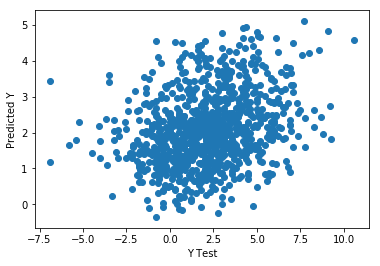

In [226]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [227]:
print(rfr.feature_importances_)

[0.06701121 0.07916065 0.06888135 0.04090284 0.04439655 0.05475619
 0.14720256 0.06178107 0.06402784 0.07025077 0.04888911 0.04415526
 0.07690338 0.04243364 0.01352456 0.01786252 0.05570896 0.00215156]


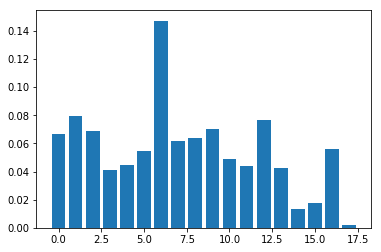

In [235]:
plt.bar(range(len(rfr.feature_importances_)), rfr.feature_importances_)
plt.show()

In [228]:
from sklearn.metrics import r2_score
from rfpimp import permutation_importances

In [137]:
def r2(rf, X_train, y_train):
    return r2_score(y_train, rfr.predict(X_train))

perm_imp_rfrpimp = permutation_importances(rfr, X_train, y_train, r2)

TypeError: 'deep' is an invalid keyword argument for this function

In [232]:
def permutation_importances(rfr, X_train, y_train, metric):
    baseline = metric(rfr, X_train, y_train)
    imp = []
    for col in X_train.columns:
        save = X_train[col].copy()
        X_train[col] = np.random.permutation(X_train[col])
        m = metric(rf, X_train, y_train)
        X_train[col] = save
        imp.append(baseline - m)
    return np.array(imp)

In [233]:
permutation_importances(rfr, X_train, y_train, r2)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'